In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import Functions

In [12]:
df1 = df_restructured

In [13]:
def calc_dist_df(df):
    df_dist = pd.DataFrame()

    prev_lat = df['lat'].shift()
    prev_lon = df['lon'].shift()
    
    df_dist['Distance'] = np.sqrt((prev_lat-df['lat'])**2 + (prev_lon-df['lon'])**2)
        
    return df_dist

In [14]:
df_dist = calc_dist_df(df1)

In [15]:
df_dist.describe()

,Distance
count,52209.000000
mean,0.024092
std,0.226527
min,0.000000
25%,0.001112
50%,0.003031
75%,0.006189
max,20.001111


In [16]:
df_dist.quantile(0.8)

Distance    0.007225
Name: 0.8, dtype: float64

In [17]:
df_dist[df_dist['Distance'] > df_dist['Distance'].quantile(0.8)*50]

,Distance
69,1.005876
70,0.999083
154,1.002543
155,0.999171
233,1.007321
...,...
51998,0.635694
52172,1.000792
52173,0.997039
52193,0.998972


In [18]:
df1_dist = calc_dist_df(df1)

In [19]:
df1_dist.describe()

,Distance
count,52209.000000
mean,0.024092
std,0.226527
min,0.000000
25%,0.001112
50%,0.003031
75%,0.006189
max,20.001111


In [28]:
    # TODO: check correctness of width of bridges
df_bridges = pd.read_excel('BMMS_overview.xlsx')

In [29]:
df_bridges[df_bridges['width'] > 45]

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
4902,R856,10.250,RCC Bridge,LRP010b,.,46.12,A,107658,Noapara (Katakhali)-Fakirhat-Mollahat Road,10.25,100.0,2004.0,3.0,Khulna,Khulna,Bagerhat,Bagerhat-2,22.773778,89.719833,bcs1
13970,Z7456,4.647,Box Culvert,LRP005b,.,1.38,A,107543,Bamundi-Hatboalia-Alamdanga Road,4.647,702.0,1989.0,1.0,Khulna,Jessore,Kushtia,Kushtia,23.856944,88.834167,bcs1


In [24]:
# Show all duplicated rows based on 'lon' and 'lat' columns, including all occurrences
duplicated_rows_lon_lat = df_bridges[df_bridges.duplicated(subset=['lon', 'lat'], keep=False)]

# Display the duplicated rows
duplicated_rows_lon_lat

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
9,N1,12.660,PC Girder Bridge,LRP013a,MADAN PUR (R),26.30,A,109841,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,12.66,9.2,2003.0,1.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.691111,90.544889,bcs1
10,N1,12.660,PC Girder Bridge,LRP013a,MADANPUR BRIDGE(L),26.30,A,109838,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,12.66,9.2,2003.0,1.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.691111,90.544889,bcs1
15,N1,18.093,PC Girder Bridge,LRP018c,Sonakhal Bridge(L),25.50,A,119933,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,18.093,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.649754,90.584549,road_interpolate
17,N1,21.184,PC Girder Bridge,LRP021c,Marikhali Bridge(L),86.92,A,119944,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,21.184,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.628467,90.602302,road_interpolate
18,N1,21.184,PC Girder Bridge,LRP021d,Marikhali Bridge(R),89.75,A,119948,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,21.184,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.628467,90.602302,road_interpolate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21309,Z7718,38.930,RCC Girder Bridge,LRP038a,Mithakali bridge,19.90,D,119191,Kachua (Pingoria)-Talighati-Herma-Rampal Road,38.93,NaN,NaN,NaN,Khulna,Khulna,Bagerhat,Bagerhat-2,0.000000,0.000000,road_interpolate
21320,Z8004,5.622,Baily with Steel Deck,LRP006a,Koola Bridge,15.20,D,120252,Munshiganj (Hatimara)-Kunderbazr-Srinagar (San...,5.622,NaN,NaN,NaN,Dhaka,Dhaka,Munshiganj,Sreenagar,23.550417,90.429388,road_precise
21344,Z8034,12.418,Baily with Steel Deck,LRP011a,Padarhat bridge,33.43,D,119178,Rahamatpur-Babuganj-Muladi-Hizla Road,12.418,NaN,NaN,NaN,Barisal,Barisal,Barisal,Barisal-1,22.837777,90.376388,road_chainage
21362,Z8203,1.192,Baily with Steel Deck,LRP001a,Hasara Bridge (East),24.00,D,120345,Keraniganj (Sayedpur)-Hashara-Birtara-Singpara...,1.192,NaN,NaN,NaN,Dhaka,Dhaka,Munshiganj,Keraniganj,0.000000,0.000000,road_interpolate


In [26]:
bmms_1, roads_1_tsv, df_boeie, roads_1 = Functions.clean('BMMS_overview.xlsx','_roads.tsv')

[(0, 209, 22.5837497, 23.5896108), (0, 464, 22.4995274, 23.5020278), (0, 701, 22.3390552, 23.3463608), (0, 2378, 22.874916, 21.879416), (0, 2381, 22.8704993, 21.879416), (0, 2453, 22.8029167, 21.8030278), (0, 2982, 91.056, 92.05475), (0, 3051, 91.0703604, 92.0703327), (2, 536, 25.9009444, 23.894833), (2, 605, 23.1011944, 23.9701382), (11, 134, 21.2984719, 22.2992219), (22, 119, 25.8362219, 23.8342497), (22, 128, 22.8439163, 23.8420274), (22, 293, 26.9698327, 23.9695549), (22, 932, 27.126943800000003, 24.1268049), (22, 1673, 23.5214438, 24.5213049), (22, 1769, 22.570749300000003, 24.5701938), (22, 2213, 22.8777493, 24.8776938), (27, 326, 25.4478886, 24.4450274), (31, 9, 90.426416, 91.7758604), (31, 12, 90.4264438, 91.7758604), (38, 500, 23.3018611, 24.2978608), (47, 3698, 23.6245827, 26.6159444), (54, 8, 25.4164722, 24.4188604), (54, 11, 25.4163889, 24.4188604), (54, 14, 25.4146667, 24.4188604), (58, 57, 91.3167493, 90.3102222), (68, 639, 89.93155490000001, 88.9399997), (68, 642, 89.923

C:\Users\julia\OneDrive\General Documents\Documents\GitHub\advanced_simulation\Functions.py:106: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lsrp = row[i]
C:\Users\julia\OneDrive\General Documents\Documents\GitHub\advanced_simulation\Functions.py:107: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat = row[i + 1]
C:\Users\julia\OneDrive\General Documents\Documents\GitHub\advanced_simulation\Functions.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position

road R171 at index 20439 changed from lat 27.9809722222222 to lat 92.0656111111111
road R241 at index 16183 changed from lat 91.5441944444444 to lat 24.7736944444444
road R241 at index 20460 changed from lat 91.5423888888889 to lat 24.7868333333333
road R241 at index 17247 changed from lat 91.5417777777777 to lat 24.7909444444444
road R241 at index 16185 changed from lat 91.5420833333333 to lat 24.7966944444444
road R241 at index 2864 changed from lat 91.5438888888888 to lat 24.8051111111111
road R241 at index 2865 changed from lat 91.5387222222222 to lat 24.8165555555555
road R241 at index 17248 changed from lat 91.5343611111111 to lat 24.8238333333333
road R241 at index 2866 changed from lat 91.5305555555555 to lat 24.8280555555555
road R241 at index 2867 changed from lat 91.5279166666666 to lat 24.8309444444444
road R241 at index 17249 changed from lat 91.5240833333333 to lat 24.8352222222222
road R241 at index 17251 changed from lat 91.5193888888888 to lat 24.8428888888888
road R24

In [11]:
#load tsv file
df_rds = pd.read_csv('_roads.tsv', delimiter='\t', low_memory=False)
df_rds = Functions.restructure_df(df_rds)

C:\Users\julia\OneDrive\General Documents\Documents\GitHub\advanced_simulation\Functions.py:106: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lsrp = row[i]
C:\Users\julia\OneDrive\General Documents\Documents\GitHub\advanced_simulation\Functions.py:107: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat = row[i + 1]
C:\Users\julia\OneDrive\General Documents\Documents\GitHub\advanced_simulation\Functions.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position

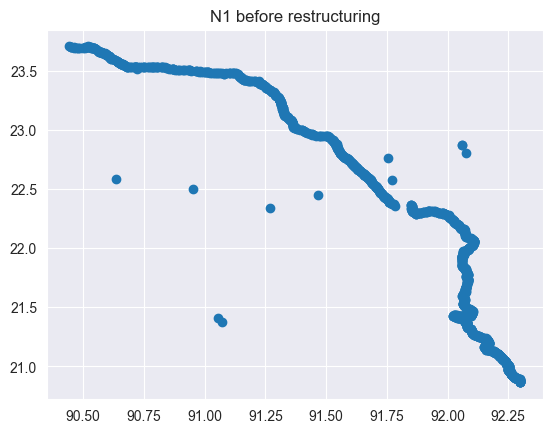

In [12]:
N1 = df_rds[df_rds['road'] == 'N1']
plt.scatter(N1['lon'], N1['lat'])
plt.title('N1 before restructuring')
plt.show()

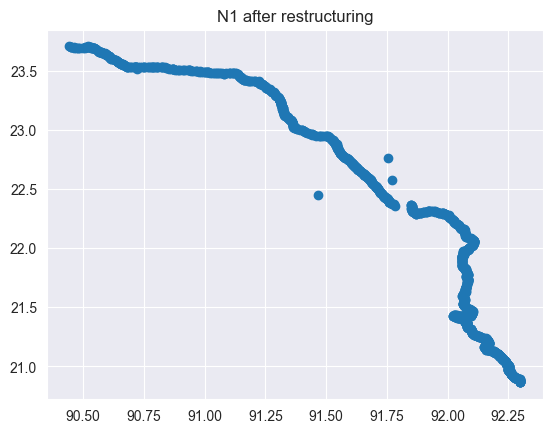

In [9]:
#plot the N1 by longitude and latitude
N1_clean = roads_1[roads_1['road'] == 'N1']
plt.scatter(N1_clean['lon'], N1_clean['lat'])
plt.title('N1 after restructuring')
plt.show()

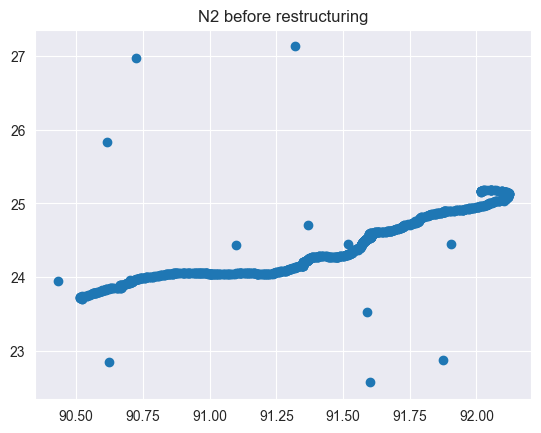

In [25]:
N2 = df_rds[df_rds['road'] == 'N2']
plt.scatter(N2['lon'], N2['lat'])
plt.title('N2 before restructuring')
plt.show()

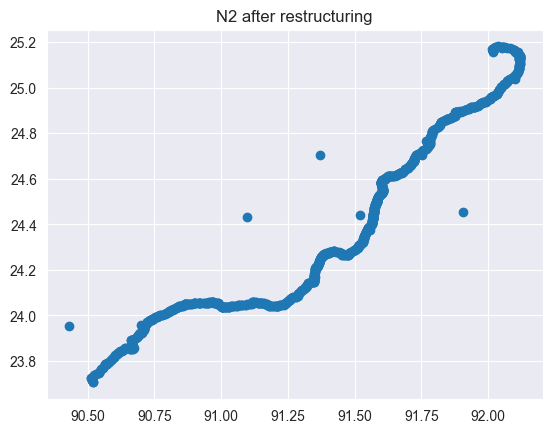

In [24]:
#plot the N1 by longitude and latitude
N2_clean = roads_1[roads_1['road'] == 'N2']
plt.scatter(N2_clean['lon'], N2_clean['lat'])
plt.title('N2 after restructuring')
plt.show()